# Chaines de Markov 
#### Propagation d'une épidémie dans une population

In [24]:
# Importer les librairies nécessaires
import numpy as np
import random as rd 
import matplotlib.pyplot as plt

# Configuration des graphes
import matplotlib as mpl
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.4) 
from matplotlib import pyplot, transforms
mpl.rcParams['figure.figsize'] = (20, 12)

Considérons des populations constituées de 3 types d'individus. Chaque individu est dans un des 3 états : sain $S$, infecté $I$ ou guéri $R$. 

Considérons qu'à chaque temps : 
- chaque individu sain peut rester sain ou devenir infecté;
- chaque individu infecté peut rester infecté ou devenir guéri;
- chaque individu guéri reste guéri *(hypothèse pour le premier exo)*

L'information utile pour la prédiction du futur est entièrement contenue dans l'état présent du processus *(propriété de Markov)*.

## 1 - Description du premier modèle

Au temps $t=0$, un individu a une probabilité de $0.9$ d'être sain et $0.1$ d'être infecté.

Un individu dans l'état sain a une probabilité de $0.92$ de rester sain et une probabilité de $0.08$ de devenir infecté. 

Si l'individu est infecté, il peut le rester avec une probabilité de $0.93$ et être guéri avec une probabilité de $0.07$. 

S'il est dans l'état guéri, il reste dans ces état avec une probabilité de $1$. 

![](graph.png)

À partir de l'hypothèse supposé au début de l'énoncé, il y a donc trois états, soient sain $S$, infecté $I$ et guéri $R$. Le vecteur de probabilité initiale est de taille $3$ et la matrice de transition est de taille $3\times3$.

On a strictement besoin que : 

$$\pi_0=\{0.9,\, 0.1,\, 0\}$$

$$A = \begin{bmatrix} 0.92 & 0.08 & 0 \\ 0 & 0.93 & 0.07 \\ 0 & 0 & 1 \end{bmatrix}$$

In [25]:
# Fonction pour vérifier qu'une matrice est stochastique et vérifier que A est stochastique
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
def is_stochastic(Matrix) : 
  verif = [np.sum(i)==1 for i in Matrix]
  return np.sum(verif)==len(Matrix)

# Test si A est stochastic
# Le résultat de ce test doit forcément rretourner True
if is_stochastic(A) : print("A est stochastique")
else : print("A n'est pas stochastique")

A est stochastique


### 1.1 Distribution théorique
Notons $\pi_t$, le vecteur de probabilité au temps $t$.

On sait que : $\mathbb{P}(C_{0}=S) = 0.9$, $\mathbb{P}(C_{0}=I) = 0.1$, $\mathbb{P}(C_{0}=R) = 0$ et que $\pi

---

Au temps $t=1$, on a : 

$\mathbb{P}(C_{1}=S) = \sum_{i\in\{S,I,R\}} \mathbb{P}(C_{1}=S, C_0=i) = \mathbb{P}(C_{0}=S|C_0=i)\mathbb{P}(C_0=i) = 0.92*0.9 = 0.828$

$\mathbb{P}(C_{1}=I) = \sum_{i\in\{S,I,R\}} \mathbb{P}(C_{1}=I, C_0=i) = \mathbb{P}(C_{0}=I|C_0=i)\mathbb{P}(C_0=i) = 0.08*0.9 + 0.93*0.1 = 0.165$

$\mathbb{P}(C_{1}=R) = \sum_{i\in\{S,I,R\}} \mathbb{P}(C_{1}=R, C_0=i) = \mathbb{P}(C_{0}=R|C_0=i)\mathbb{P}(C_0=i) = 0.07 * 0.1 = 0.007$

On obtient $\pi_1 = \{0.828,\, 0.165,\, 0.007\}$

---

Au temps $t=2$, on a : 

$\mathbb{P}(C_{2}=S) = \sum_{i\in\{S,I,R\}} \mathbb{P}(C_{2}=S, C_1=i) = \mathbb{P}(C_{1}=S|C_1=i)\mathbb{P}(C_1=i) = 0.92*0.828 = 0.76176$

$\mathbb{P}(C_{2}=I) = \sum_{i\in\{S,I,R\}} \mathbb{P}(C_{2}=I, C_1=i) = \mathbb{P}(C_{1}=I|C_1=i)\mathbb{P}(C_1=i) = 0.08*0.828 + 0.93*0.165 = 0.21969$

$\mathbb{P}(C_{2}=R) = \sum_{i\in\{S,I,R\}} \mathbb{P}(C_{2}=R, C_1=i) = \mathbb{P}(C_{1}=R|C_1=i)\mathbb{P}(C_1=i) = 0.07 * 0.165 + 0.007*1 = 0.01855$

On obtient $\pi_1 = \{0.76176,\, 0.21969,\, 0.01855\}$

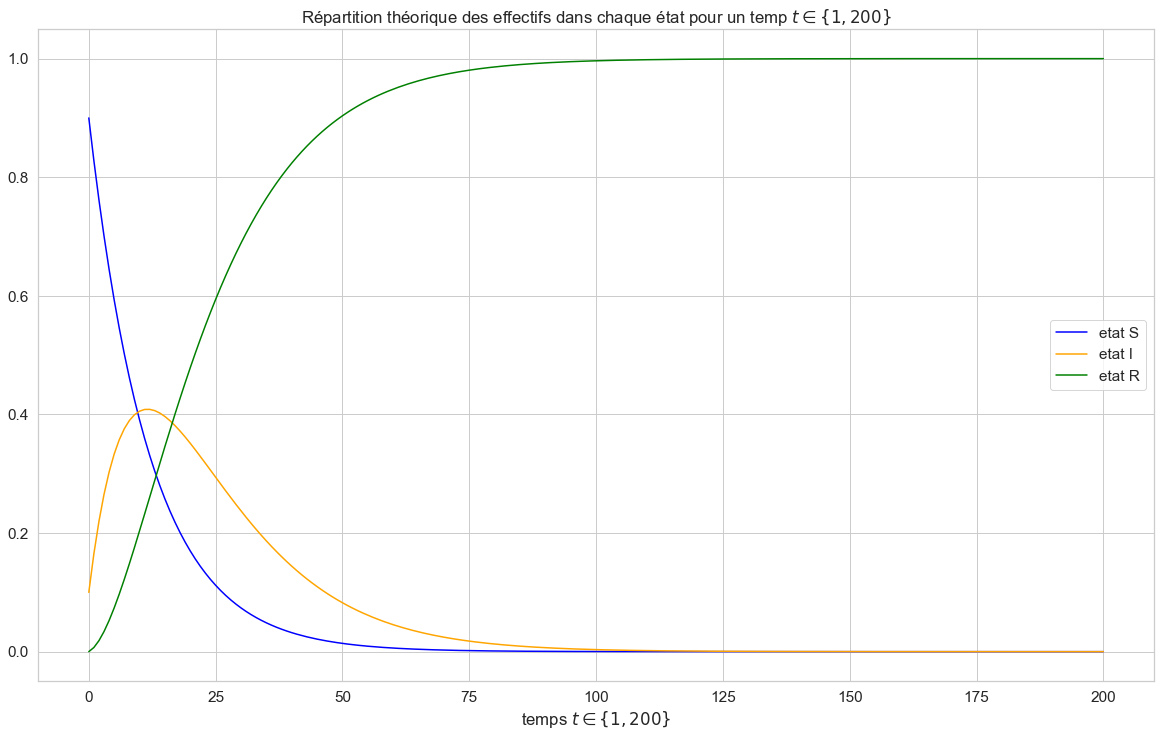

In [34]:
# Calcul de la distrubution théorique, t entre 1 et 200
pi_0 = [0.9, 0.1, 0]
S, I, R = [pi_0[0]], [pi_0[1]], [pi_0[2]]
for i in range(1,201) :
  pi_0 = np.dot(pi_0, A)
  S.append(pi_0[0]); I.append(pi_0[1]); R.append(pi_0[2])

# Plot
plt.plot(S, c="blue", label="etat S")
plt.plot(I, c="orange", label="etat I")
plt.plot(R, c="green", label="etat R")

plt.xlabel(r"temps $t \in \{1,200\}$")

plt.title(r"Répartition théorique des effectifs dans chaque état pour un temp $t \in \{1,200\}$")
plt.legend(loc="center right")

### 1.2 Distribution observée
#### 1.2.1 Tirage aléatoire des états


In [27]:
# Pour générer une séquence aléatoire de taille T avec la chaine de Markov donnée ci-dessus
def generate_markov_sequence(pi_0, A, T):
  # Vérifier que les dimensions de pi_0 et A sont cohérentes
  if len(pi_0) != len(A) or any(len(row) != len(A) for row in A):
    raise ValueError("Les dimensions de pi_0 et A ne sont pas compatibles.")

  # Générer le premier état selon la distribution initiale pi_0
  current_state = np.random.choice(len(pi_0), p=pi_0)
  sequence = [current_state]

  # Générer les états suivants en utilisant la matrice de transition A
  for _ in range(1, T):
    probabilities = A[current_state]
    next_state = np.random.choice(len(probabilities), p=probabilities)
    sequence.append(next_state)
    current_state = next_state

  return sequence


# Définition des paramètres
T = 150
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
pi_0 = [0.9, 0.1, 0]

# Générer la séquence aléatoire
sequence = generate_markov_sequence(pi_0, A, T)
print(sequence)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


#### 1.2.2 Modélisation d'une population

À partir des graphes simulés ci-dessous, on peut observer que plus $t$ est grand, plus la proportion d'individus sains et infectés s'approchent de $0$, et en revanche, plus la proportion d'individus guéris se converge vers $1$.

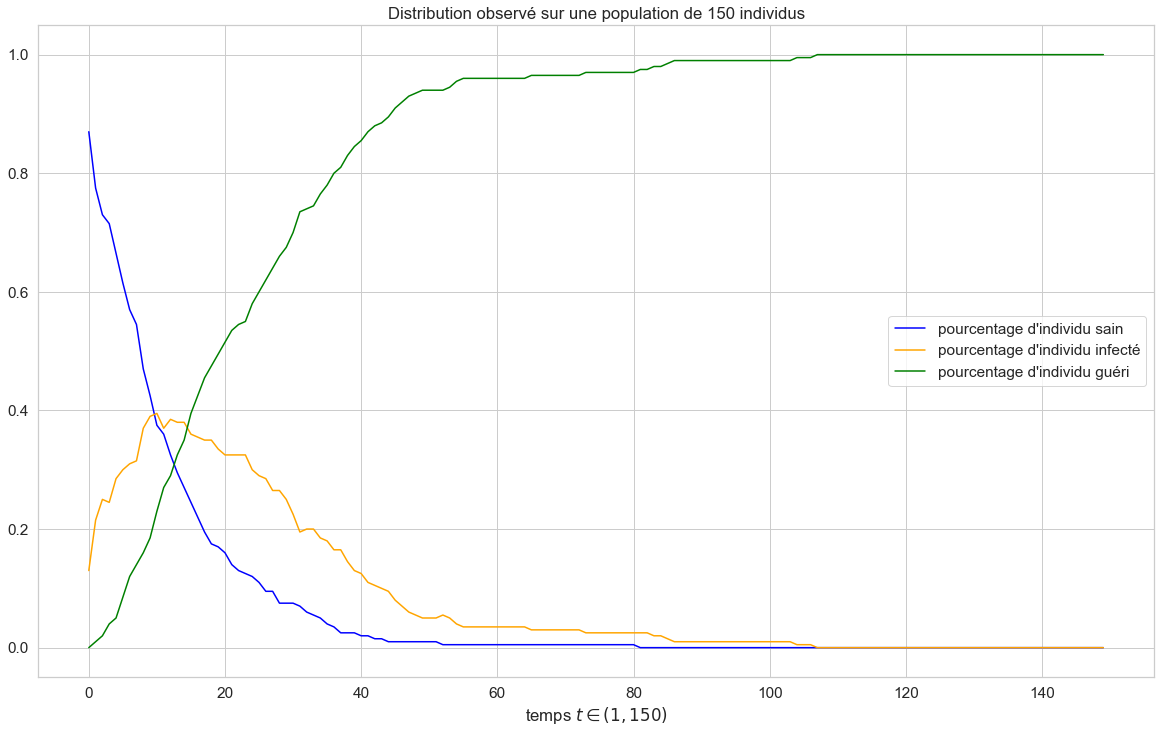

In [74]:
def graph_evolution(pi_0, A, T) : 
  # Génération d'une séquence aléatoire représentant 200 individus
  sequence_200_indiv = [generate_markov_sequence(pi_0, A, T) for _ in range(200)]
  S, I, R = [], [], []

  for i in range(T) : 
    S.append(len([sequence_200_indiv[j][i] for j in range(200) if sequence_200_indiv[j][i]==0])/200)
    I.append(len([sequence_200_indiv[j][i] for j in range(200) if sequence_200_indiv[j][i]==1])/200)
    R.append(len([sequence_200_indiv[j][i] for j in range(200) if sequence_200_indiv[j][i]==2])/200)

  # Plot
  plt.plot(S, c="blue", label="pourcentage d'individu sain")
  plt.plot(I, c="orange", label="pourcentage d'individu infecté")
  plt.plot(R, c="green", label="pourcentage d'individu guéri")

  plt.xlabel(f"temps $t \in {1, {} }$".format(T))

  plt.title(r"Distribution observé sur une population de {} individus".format(T))
  plt.legend(loc="center right")

  plt.show()

# Définition des paramètres
T = 150
A = [[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]
pi_0 = [0.9, 0.1, 0]

# Afficher l'évolution de 150 individus dans les trois états en fonction du temps
graph_evolution(pi_0, A, T)

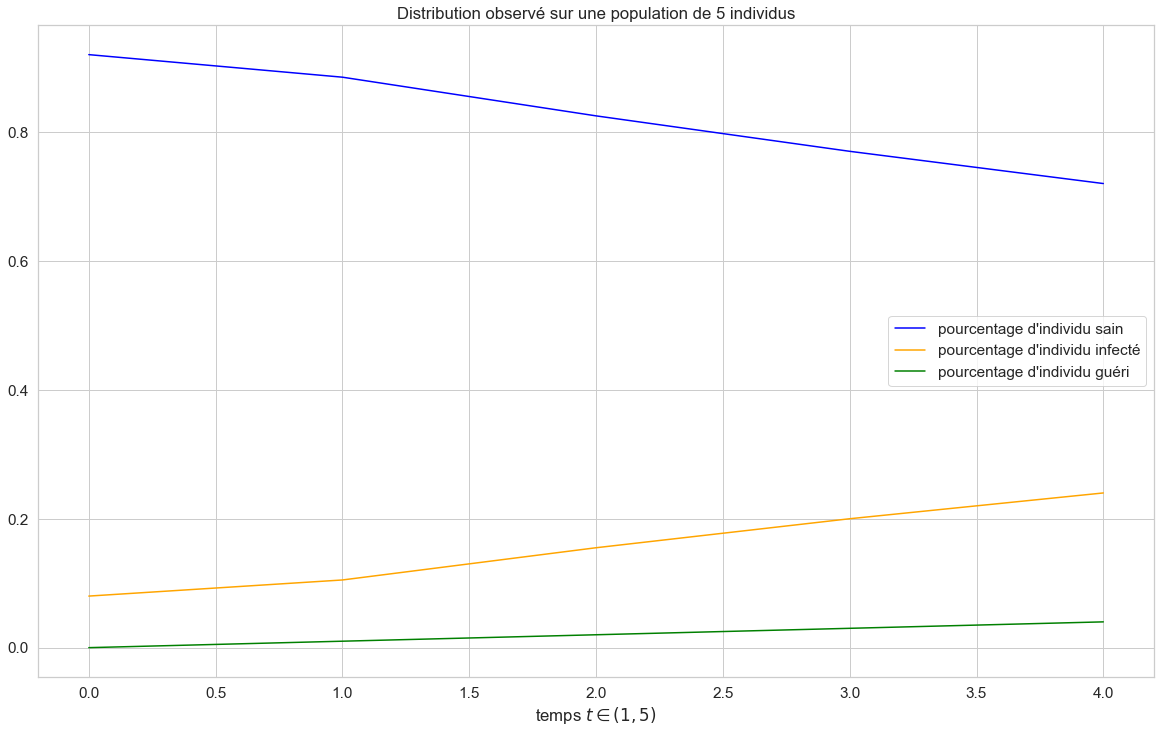

In [75]:
# Afficher l'évolution de 5 individus dans les trois états en fonction du temps
graph_evolution(pi_0, A, 5)

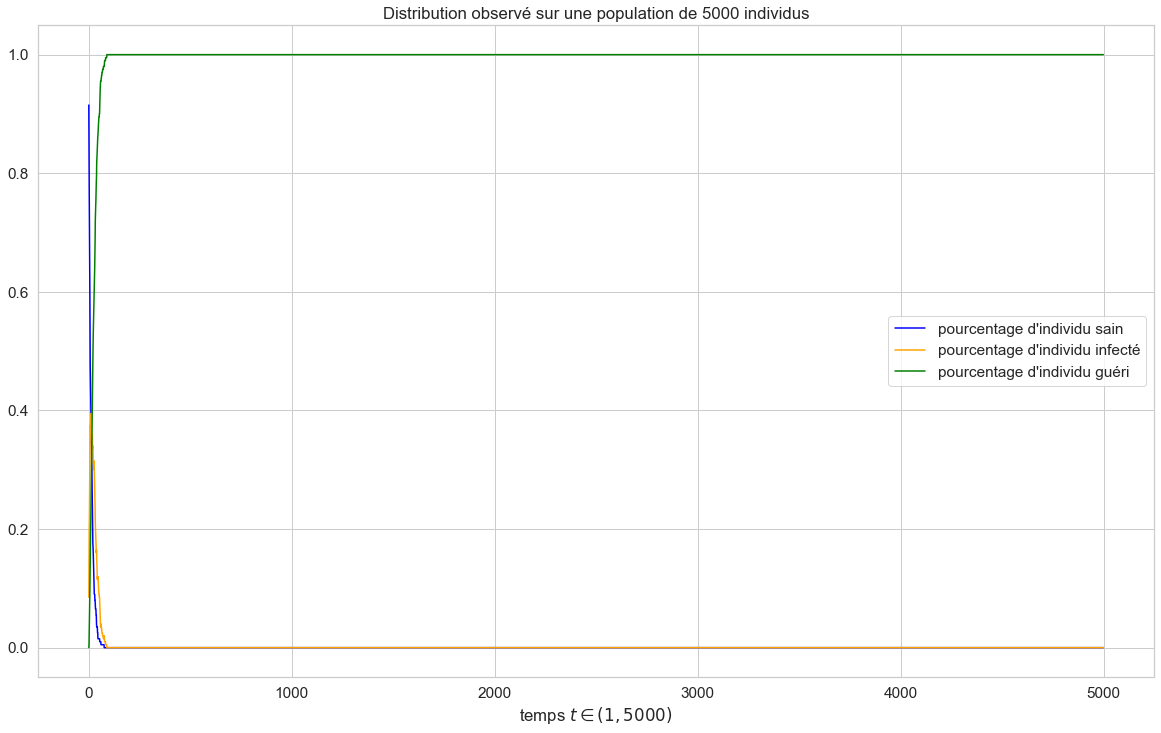

In [76]:
# Afficher l'évolution de 5000 individus dans les trois états en fonction du temps
graph_evolution(pi_0, A, 5000)

### 1.3 Longueur de l'infection

<BarContainer object of 200 artists>

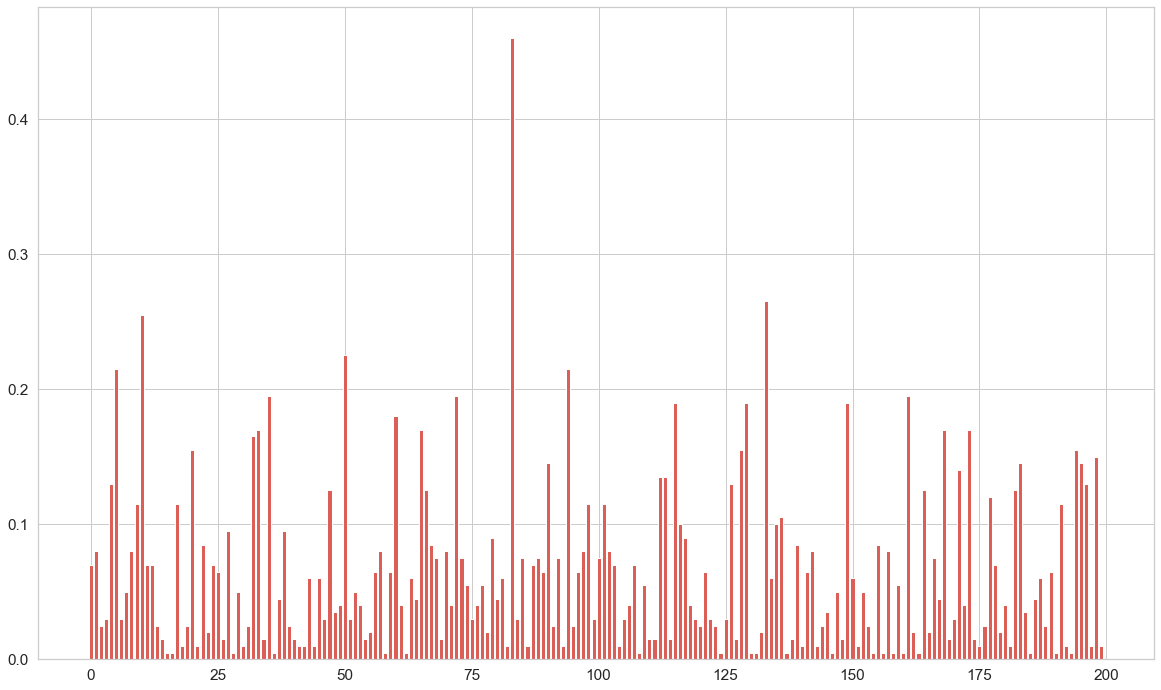

In [83]:
# Estimer la longueur moyenne d'une séquence de I
sequence_200_indiv = [generate_markov_sequence(pi_0, A, T) for _ in range(200)]
infection_length = [len([j for j in i if j==1])/200 for i in sequence_200_indiv]

plt.bar(range(200), infection_length)